<a href="https://colab.research.google.com/github/Alejandro0699/telecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

###**Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [45]:
#importamos el json
url='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df_telecom=pd.read_json(url)
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

###Conoce el conjunto de datos

In [46]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [47]:
#normalizamos el df
df_customer = pd.json_normalize(df_telecom['customer'])
df_phone = pd.json_normalize(df_telecom['phone'])
df_internet= pd.json_normalize(df_telecom['internet'])
df_account = pd.json_normalize(df_telecom['account'])
#eliminamos las columnas customer, phone, internet, account
df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)
#unico o concatenamos las columnas normalizadas
df_telecom_norm = pd.concat([df_telecom, df_customer, df_phone, df_internet, df_account], axis=1)
#pd.set_option('display.max_columns', None) esto hace que se pueda ver toda las columnas sin que se salteen
pd.set_option('display.max_columns', None)
df_telecom_norm.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [48]:
columnas=list(df_telecom_norm.columns)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

###Comprobación de incoherencias en los datos
En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [49]:
df_telecom_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [50]:
#detectamos si hay valores nulos
df_telecom_norm.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [51]:
#detectamos si hay str vacios, me fije en todas las columnas una por una y solamente deje las que estan vacios o tienen un espacio en blanco
(df_telecom_norm['Churn']=='').sum()

np.int64(224)

In [52]:
(df_telecom_norm['Charges.Total']==' ').sum()

np.int64(11)

###Manejo de inconsistencias
Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [53]:
#ahora trataremos los valores str vacios, considere que los valores en churn no los vamos a eliminar por el momento, a la columna churn la trataremos como valores enteros
#pasamos el churn a valores si 1, no 0 y los vacios -1 para futuros analisis
df_telecom_norm['Churn']= df_telecom_norm['Churn'].str.strip().replace('',-1)
#para el changes.total que seria lo que gasto el cliente en total, lo dejaremos en 0 porque puede que el cliente sea nuevo o en cierto periodo no facturo
df_telecom_norm['Charges.Total']= df_telecom_norm['Charges.Total'].str.strip().replace('','0')
df_telecom_norm.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [54]:
#eliminaremos las filas que tengan los valores nulos
df_telecom_norm.dropna(subset=['Churn','Charges.Total'], inplace=True)
df_telecom_norm.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [55]:
df_telecom_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [56]:
#creamos una lista con las columnas, que queremos transformar a booleanos
df_bool=['Partner','Dependents','PhoneService','PaperlessBilling']
df_telecom_norm[df_bool]=df_telecom_norm[df_bool].replace({'Yes': True, 'No':False})
df_telecom_norm[df_bool]=df_telecom_norm[df_bool].astype('bool')
df_telecom_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


/tmp/ipython-input-56-1265755633.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [57]:
df_telecom_norm['Churn'].unique()

array(['No', 'Yes', -1], dtype=object)

In [58]:
#pasaremo la columa churn a enteros, primero reemplazaremos el Yes y No por 1 y 0
df_telecom_norm['Churn']=df_telecom_norm['Churn'].replace({'Yes':1, 'No':0})
df_telecom_norm['Churn']=df_telecom_norm['Churn'].astype('int64')
#creamos una lista para transformar str
df_str=['gender','InternetService','Contract','PaymentMethod']
df_telecom_norm[df_str]=df_telecom_norm[df_str].astype('string')
#pasamos a float la columna Changes.Total
df_telecom_norm['Charges.Total']=df_telecom_norm['Charges.Total'].astype('float64')
#creamos una lista para cambiar a categoria
df_categoria= ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_telecom_norm[df_categoria]=df_telecom_norm[df_categoria].astype('category')
df_telecom_norm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   int64   
 2   gender            7267 non-null   string  
 3   SeniorCitizen     7267 non-null   int64   
 4   Partner           7267 non-null   bool    
 5   Dependents        7267 non-null   bool    
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   bool    
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   string  
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

/tmp/ipython-input-58-3766877244.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [59]:
#Verificamos duplicados
df_telecom_norm.duplicated().sum()

np.int64(0)

###Columna de cuentas diarias
Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [60]:
df_telecom_norm['Cuentas_Diarias']=(df_telecom_norm['Charges.Monthly']/30).round(2)
df_telecom_norm['Cuentas_Diarias']=df_telecom_norm['Cuentas_Diarias'].astype('float64')
df_telecom_norm.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,True,True,9,True,No,DSL,No,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,False,False,9,True,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,False,False,4,True,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,True,False,13,True,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,True,False,3,True,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80


###Estandarización y transformación de datos (opcional)
La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [61]:
#Procedemos a transformar los valores yes y no, que ya tenemos en una variable para pasarlos a numeros binarios
df_telecom_norm[df_categoria]=df_telecom_norm[df_categoria].replace({'Yes':1,'No':0, 'No internet service':-1})
df_telecom_norm.head()

/tmp/ipython-input-61-3113015026.py:2: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

/tmp/ipython-input-61-3113015026.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-61-3113015026.py:2: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

/tmp/ipython-input-61-3113015026.py:2: FutureWarning:

Downcasting behavior in `rep

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,True,True,9,True,0,DSL,0,1,0,1,1,0,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,False,False,9,True,1,DSL,0,0,0,0,0,1,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,False,False,4,True,0,Fiber optic,0,0,1,0,0,0,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,True,False,13,True,0,Fiber optic,0,1,1,0,1,1,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,True,False,3,True,0,Fiber optic,0,0,0,1,1,0,Month-to-month,True,Mailed check,83.9,267.40,2.80


In [62]:
df_telecom_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   int64   
 2   gender            7267 non-null   string  
 3   SeniorCitizen     7267 non-null   int64   
 4   Partner           7267 non-null   bool    
 5   Dependents        7267 non-null   bool    
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   bool    
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   string  
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [63]:
#Creamos una variable que contenga los nombres traducidos y luego los reemplazamos en una variable
df_telecom_rename=['ID','Activo','Genero','Cuidadano_mayor_65','Pareja','Tiene_dependientes','meses_contrato','Servicio_telefonico','Varias_lineas',
                       'Servicio_internet','Seguridad_en_linea','respaldo_en_linea','Proteccion_del_dispositivo','Soporte_tencnico','Trasmision_a_TV',
                       'Transmision_a_Peliculas','Contrato','Factura_electronica','Metodo_de_pago','Cargos_mensuales','Cargo_total','Cuentas_Diarias']
df_telecom_norm.columns=df_telecom_rename
df_telecom_norm.head()

,ID,Activo,Genero,Cuidadano_mayor_65,Pareja,Tiene_dependientes,meses_contrato,Servicio_telefonico,Varias_lineas,Servicio_internet,Seguridad_en_linea,respaldo_en_linea,Proteccion_del_dispositivo,Soporte_tencnico,Trasmision_a_TV,Transmision_a_Peliculas,Contrato,Factura_electronica,Metodo_de_pago,Cargos_mensuales,Cargo_total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,True,True,9,True,0,DSL,0,1,0,1,1,0,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,False,False,9,True,1,DSL,0,0,0,0,0,1,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,False,False,4,True,0,Fiber optic,0,0,1,0,0,0,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,True,False,13,True,0,Fiber optic,0,1,1,0,1,1,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,True,False,3,True,0,Fiber optic,0,0,0,1,1,0,Month-to-month,True,Mailed check,83.9,267.40,2.80


In [64]:
df_telecom_norm['Servicio_internet'].unique()

<StringArray>
['DSL', 'Fiber optic', 'No']
Length: 3, dtype: string

#📊 Carga y análisis

###Análisis Descriptivo
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [65]:
descripcion= df_telecom_norm['Activo'].describe()
print('Estadisticas Descriptivas Basicas')
print(descripcion)


Estadisticas Descriptivas Basicas
count    7267.000000
mean        0.226366
std         0.486627
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Activo, dtype: float64


Media (0.22):

Como los valores son -1, 0, 1, un promedio de 0.23 sugiere que hay más 0/-1 que 1. (lo que indica que hay mas personas dadas de baja)

Mediana 50%(0):

El 50% de los valores son ≤ 0, lo que indica que la mayoría de clientes están inactivos (-1) o dados de baja (0).

Desviación estándar (0.48):

Valores cercanos a 0 indican poca dispersión. Aquí, 0.48 sugiere que los datos están ligeramente dispersos alrededor de la media.

In [66]:
activos=df_telecom_norm['Activo'].value_counts().sort_values()
print(activos)
porcentajes=activos/activos.sum()*100
print(porcentajes)

Activo
-1     224
 1    1869
 0    5174
Name: count, dtype: int64
Activo
-1     3.082427
 1    25.719004
 0    71.198569
Name: count, dtype: float64


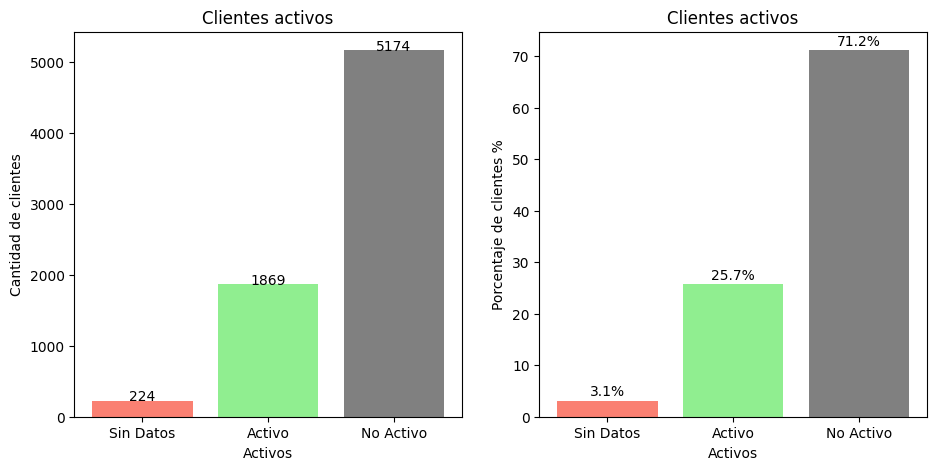

In [67]:
# Diccionario de reemplazo para las etiquetas
etiquetas={-1:'Sin Datos', 0:'No Activo', 1:'Activo'}
labels=[etiquetas[i] for i in activos.index]
#Generamos un grafico para ver con mas claridad cuantos clientes siguen activos y cuantos dejaron
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11,5))
ax1.bar(labels,activos, color=['salmon', 'lightgreen','gray'])
ax1.set_title('Clientes activos')
ax1.set_xlabel('Activos')
ax1.set_ylabel('Cantidad de clientes')
for i, v in enumerate(activos):
    ax1.text(i, v + 1, str(v), ha='center')

ax2.bar(labels,porcentajes.values, color=['salmon', 'lightgreen','gray'])
ax2.set_title('Clientes activos')
ax2.set_xlabel('Activos')
ax2.set_ylabel('Porcentaje de clientes %')
for i, v in enumerate(porcentajes):
    ax2.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()


Podemos ver que mas a simple vista en el graficos la fuga de clientes

In [68]:
px.histogram(df_telecom_norm, x = 'Genero', text_auto = True, color = 'Activo', barmode = 'group')

Lo que podemos analizar gracias al grafico es que no hay una señal que indique que sea por el genero la evasion o fuga de clientes. Esta bastante igualada

In [69]:
px.histogram(df_telecom_norm, x = 'Cuidadano_mayor_65', text_auto = True, color = 'Activo', barmode = 'group')

En el grafico de la izquierda nos deja ver que los cuidadanos menores a los 65 años estan presentando un indicio de fuga de clientes. Estan presentando una fuga 1393

Por el lado derecho vemos un grafico de las personas mayores a 65 años, aunque parezca una fuga minima, el promedio de fuga o evasion es mas alta que la de los clientes menores a 65

Por lo tanto esta columna no da indicios de las fuga de los clientes

In [70]:
df_telecom_norm['Cuidadano_mayor_65'].describe()*100

,Cuidadano_mayor_65
count,726700.000000
mean,16.265309
std,36.907426
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [71]:
px.histogram(df_telecom_norm, x = 'meses_contrato', text_auto = True, color = 'Activo', barmode = 'group')

Este grafico describe los clientes y cuanto tiempo de contrato tienen o en que mes tuvieron la evasion

Por lo que se puede analizar los clientes con contratos mes a mes o contrato de pocos meses tuvieron mayor evasion a los clientes con contratos de muchos meses o años

Y tambien podemos ver como la evasion va cayendo con el tiempo

In [72]:
df_telecom_norm['meses_contrato'].tail()

,meses_contrato
7262,13
7263,22
7264,2
7265,67
7266,63


In [73]:
#Vamos a intentar ver mas claramente la caida de evasion durante los meses
# Agrupar por tenure y Churn
df_grouped = df_telecom_norm.groupby(['meses_contrato', 'Activo']).size().unstack(fill_value=0)

# Calcular el % de churn por tenure
df_grouped['Activo_rate'] = (df_grouped.get(1, 0) / df_grouped.sum(axis=1)) * 100

# Mostrar el resultado
print(df_grouped[['Activo_rate']])


Activo          Activo_rate
meses_contrato             
0                  0.000000
1                 59.936909
2                 50.000000
3                 45.410628
4                 44.864865
...                     ...
68                 8.653846
69                 8.000000
70                 9.016393
71                 3.409091
72                 1.626016

[73 rows x 1 columns]


In [74]:
fig = px.line(df_grouped.reset_index(),
              x='meses_contrato',
              y='Activo_rate',
              markers=True,
              title='Tasa de Activos (%) por Meses de contrato')
fig.show()

Podemos ver mas claramente como los clientes con contratos mas largos evaden menos que los clientes que tienen contratos mes a mes

In [75]:
px.histogram(df_telecom_norm, x = 'Contrato', text_auto = True, color = 'Activo', barmode = 'group')

Aca vemos mas claramente y tenemos otro indice mas de la fuga de clientes

In [76]:
px.histogram(df_telecom_norm, x = 'Servicio_internet', text_auto = True, color = 'Activo', barmode = 'group')

Aca podemos ver que el servicio de internet tambien presenta una fuga de clientes altas y lo que parece raro es que la fuga sea en el servicio de fibra optica.

Lo cual indica que es el servicio no debe ser bueno, es un posible punto a mejorar

In [77]:
px.histogram(df_telecom_norm, x = 'Trasmision_a_TV', text_auto = True, color = 'Activo', barmode = 'group')

En la columna Transmision a TV o steamingTV podemos notar que las fuga de clientes es muy parecida por lo cual no es un indicador que sea por este servicio

-1: No internet Service

0: No

1: Yes

In [79]:
px.histogram(df_telecom_norm, x = 'Metodo_de_pago', text_auto = True, color = 'Activo', barmode = 'group')

El metodo de pago que esta dando indicio de evasion de fuga es el Electronic check

teniendo una fuga de clientes grande a comparacion de los otros metodos de pago

#📄Informe final